#                                    **Titanic Survival Prediction**

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


### Reading csv file

In [ ]:
url="/content/Titanic-Dataset.csv"
df=pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking whether PassengerId is unique

In [ ]:
df["PassengerId"].is_unique

True

### Setting PassengerId as index

In [ ]:
df.set_index("PassengerId",inplace=True)
df.sort_index(ascending=True)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Columns of dataframe

In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Dimensions of dataframe

In [ ]:
df.shape

(891, 11)

### Basic Information of dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


### Descriptive statistcis of dataframe

In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data types of columns

In [ ]:
df.dtypes

,0
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64
Cabin,object


In [ ]:
#converting sex column to category data type
df["Sex"]=df["Sex"].astype("category")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#checking whether there are null values
df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
#filling null values of age column with its mean
df["Age"]=df["Age"].fillna(df["Age"].median())

df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,687


In [ ]:
#Dropping Cabin column
df.drop("Cabin",axis=1,inplace=True)

df.isna().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,2


In [ ]:
#dropping null values
df.dropna(inplace=True)

In [ ]:
#checking duplicate values
df.duplicated().sum()

0

### Creating a new column "family"

In [ ]:
df["family"]=df["SibSp"]+df["Parch"]

### Survival count of family

Text(0.5, 1.0, 'Survival count of family')

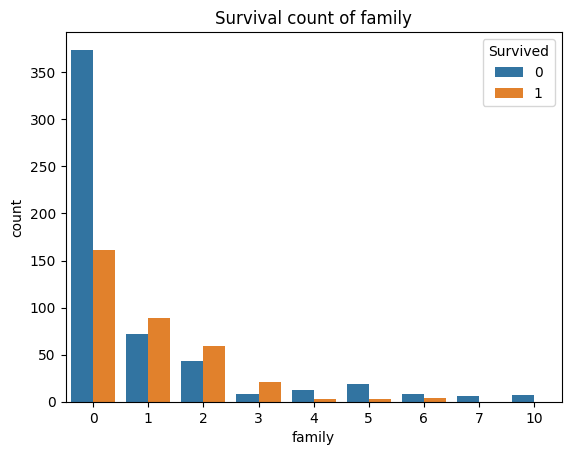

In [ ]:
sns.countplot(x="family",hue="Survived",data=df)
plt.title("Survival count of family")

In [ ]:
df["Survived"].value_counts()

,count
Survived,
0,549
1,340


Text(0.5, 1.0, 'Total survival rate')

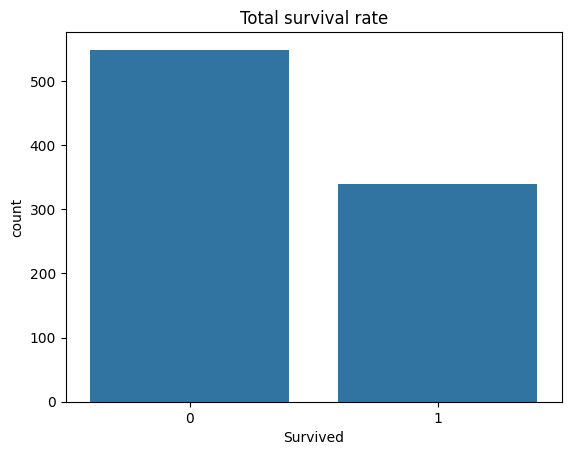

In [ ]:
sns.countplot(x="Survived",data=df)
plt.title("Total survival rate")

In [ ]:
df["Sex"].value_counts()

,count
Sex,
male,577
female,312


Text(0.5, 1.0, 'Gender-based distribution of passengers')

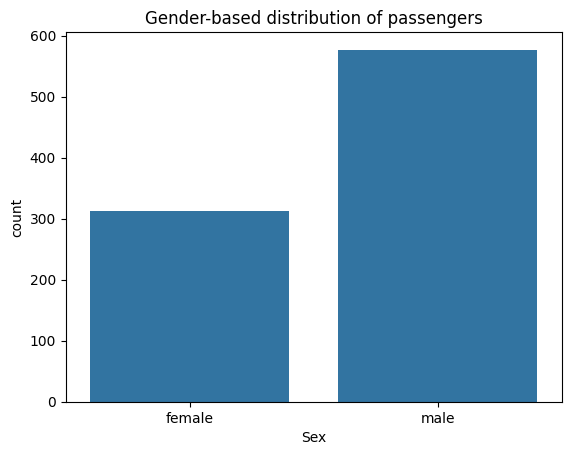

In [ ]:
sns.countplot(x="Sex",data=df)
plt.title("Gender-based distribution of passengers")

In [ ]:
#survival rate based on gender
df.groupby("Sex",as_index=False)["Survived"].value_counts()

<ipython-input-44-ffd7f9325158>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Sex",as_index=False)["Survived"].value_counts()


,Sex,Survived,count
0,female,1,231
1,female,0,81
2,male,0,468
3,male,1,109


Text(0.5, 1.0, 'Survival rate based on gender')

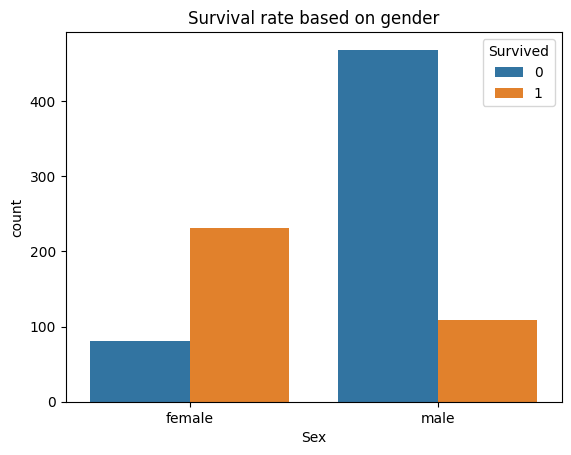

In [ ]:
sns.countplot(x="Sex",hue="Survived",data=df)
plt.title("Survival rate based on gender")

In [ ]:
df["family"].unique()

array([ 1,  0,  4,  2,  6,  5,  3,  7, 10])

In [ ]:
df.groupby("family",as_index=False)["Survived"].value_counts()

,family,Survived,count
0,0,0,374
1,0,1,161
2,1,1,89
3,1,0,72
4,2,1,59
5,2,0,43
6,3,1,21
7,3,0,8
8,4,0,12
9,4,1,3


In [ ]:
print("Min age:",df["Age"].min())
print("Max age:",df["Age"].max())
df.groupby(["Age"])["Survived"].mean()

Min age: 0.42
Max age: 80.0


,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


Text(0.5, 1.0, 'Distribution of age who travelled')

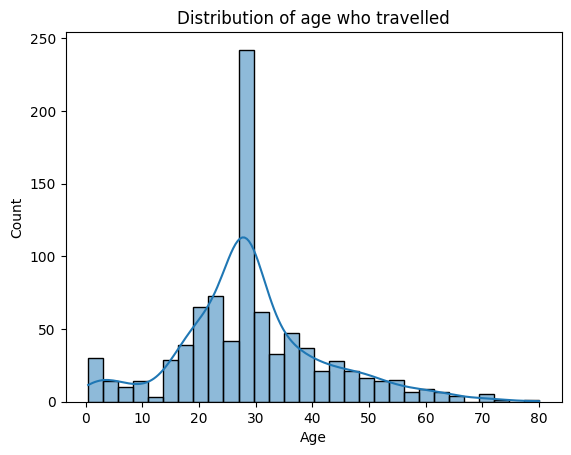

In [ ]:
#Distribution of Age who travelled
sns.histplot(x="Age",data=df,kde=True)
plt.title("Distribution of age who travelled")

### Model Training

In [ ]:
X=df[['Pclass','Sex']]
Y=df['Survived']

# Perform one-hot encoding on the 'Sex' column
X = pd.get_dummies(X, columns=['Sex'], drop_first=True)  # drop_first to avoid multicollinearity


In [ ]:
#model building
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=7)

In [ ]:
# Import the desired model class
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression()

#fitting our data to the model
model.fit(x_train,y_train)

LogisticRegression()

### Model Prediction

In [ ]:
Y_pred_test=model.predict(x_test)
Y_pred_test

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0])

In [ ]:
print(y_test)

PassengerId
170    0
218    0
61     0
54     1
454    1
      ..
310    1
279    0
457    0
767    0
144    0
Name: Survived, Length: 178, dtype: int64


In [ ]:
import warnings
warnings.filterwarnings('ignore')
res = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred_test})
res

,Actual,Predicted
PassengerId,,
170,0,0
218,0,0
61,0,0
54,1,1
454,1,0
...,...,...
310,1,1
279,0,0
457,0,0


### Model Accuracy

In [ ]:
model.score(x_train,y_train)

0.7918424753867792

In [ ]:
#import metrics to check accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:.4f}'. format(accuracy_score(y_test, Y_pred_test)))

Model accuracy score: 0.7640


### Conclusion

Using logistic regression and important characteristics including passenger class and gender, the Titanic survival prediction model was constructed.  The model was trained and assessed following preprocessing, which included feature selection, encoding categorical variables, and managing missing data.  How successfully the model predicts survival is shown by the accuracy score.